In [1]:
# imports
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

np.random.seed(7)

In [2]:
import os
os.getcwd()
os.chdir("../")
%pwd

'C:\\Users\\Lenovo\\Documents\\Masters_thesis'

In [3]:
FILE_DIR = "artifacts"
FILE_PATH = "nsp1,3,5,8,9,13,15_mutation_rate_1e7_rounded_without_duplicates.csv"

In [4]:
data = pd.read_csv(os.path.join(FILE_DIR, FILE_PATH))
data.tail()

,AC,AT,AG,CA,CT,CG,TA,TC,TG,GA,GC,GT
80220,0.0,0.0,0.0,0.0,6.75790,0.0,0.0,1.12632,0.0,0.0,0.0,1.12632
80221,0.0,0.0,0.0,0.0,6.75790,0.0,0.0,0.00000,0.0,0.0,0.0,1.12632
80222,0.0,0.0,0.0,0.0,5.63158,0.0,0.0,0.00000,0.0,0.0,0.0,1.12632
80223,0.0,0.0,0.0,0.0,4.50527,0.0,0.0,1.12632,0.0,0.0,0.0,2.25263
80224,0.0,0.0,0.0,0.0,5.63158,0.0,0.0,2.25263,0.0,0.0,0.0,1.12632


In [5]:
data.describe()

,AC,AT,AG,CA,CT,CG,TA,TC,TG,GA,GC,GT
count,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000,80225.000000
mean,0.041796,0.028135,0.454669,0.780920,4.654745,0.001558,0.022730,1.116771,0.020189,0.164122,0.005630,0.421395
std,0.219417,0.186854,0.716400,0.579018,1.484756,0.042616,0.161251,0.795216,0.151435,0.459334,0.081398,0.759882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.378950,0.000000,0.000000,1.126320,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.126320,4.505270,0.000000,0.000000,1.126320,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.126320,1.126320,5.631580,0.000000,0.000000,1.126320,0.000000,0.000000,0.000000,1.126320
max,3.378950,4.505270,10.136850,4.505270,13.515800,2.252630,3.378950,12.389480,5.631580,6.757900,3.378950,6.757900


In [6]:
value_counts_total=data.apply(pd.Series.value_counts)
value_counts_total

,AC,AT,AG,CA,CT,CG,TA,TC,TG,GA,GC,GT
0.00000,77334.0,78335.0,53514.0,26346.0,246,80116.0,78634.0,18137.0,78799.0,69948.0,79833.0,57624.0
1.12632,2808.0,1787.0,21857.0,52448.0,2654,107.0,1564.0,46578.0,1418.0,9089.0,384.0,16489.0
2.25263,80.0,94.0,4092.0,1133.0,3591,2.0,26.0,13754.0,6.0,997.0,7.0,4945.0
3.37895,3.0,7.0,713.0,283.0,16530,NaN,1.0,1607.0,1.0,162.0,1.0,1043.0
4.50527,NaN,2.0,45.0,15.0,28098,NaN,NaN,113.0,NaN,25.0,NaN,116.0
5.63158,NaN,NaN,2.0,NaN,18777,NaN,NaN,35.0,1.0,3.0,NaN,5.0
6.75790,NaN,NaN,1.0,NaN,7457,NaN,NaN,NaN,NaN,1.0,NaN,3.0
7.88421,NaN,NaN,NaN,NaN,2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.01053,NaN,NaN,NaN,NaN,567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.13685,NaN,NaN,1.0,NaN,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN


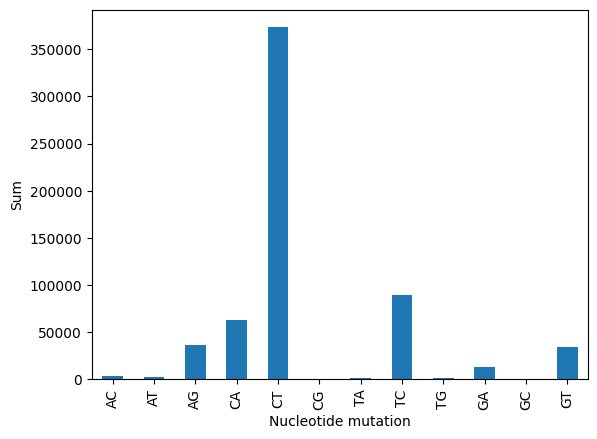

In [17]:
data.sum().plot(kind='bar')
plt.xlabel('Nucleotide mutation')
plt.ylabel('Sum')
#plt.title('')
plt.savefig(os.path.join("notebooks_7proteins", "plots", "bar.jpg"), dpi=400)
plt.show()

In [8]:
sum=value_counts_total.sum(axis=1)
sum=sum.sort_values(ascending=False)
sum

0.00000     698866.0
1.12632     157183.0
2.25263      28727.0
4.50527      28414.0
3.37895      20351.0
5.63158      18823.0
6.75790       7462.0
7.88421       2120.0
9.01053        567.0
10.13685       149.0
12.38948        19.0
11.26316        16.0
13.51580         3.0
dtype: float64

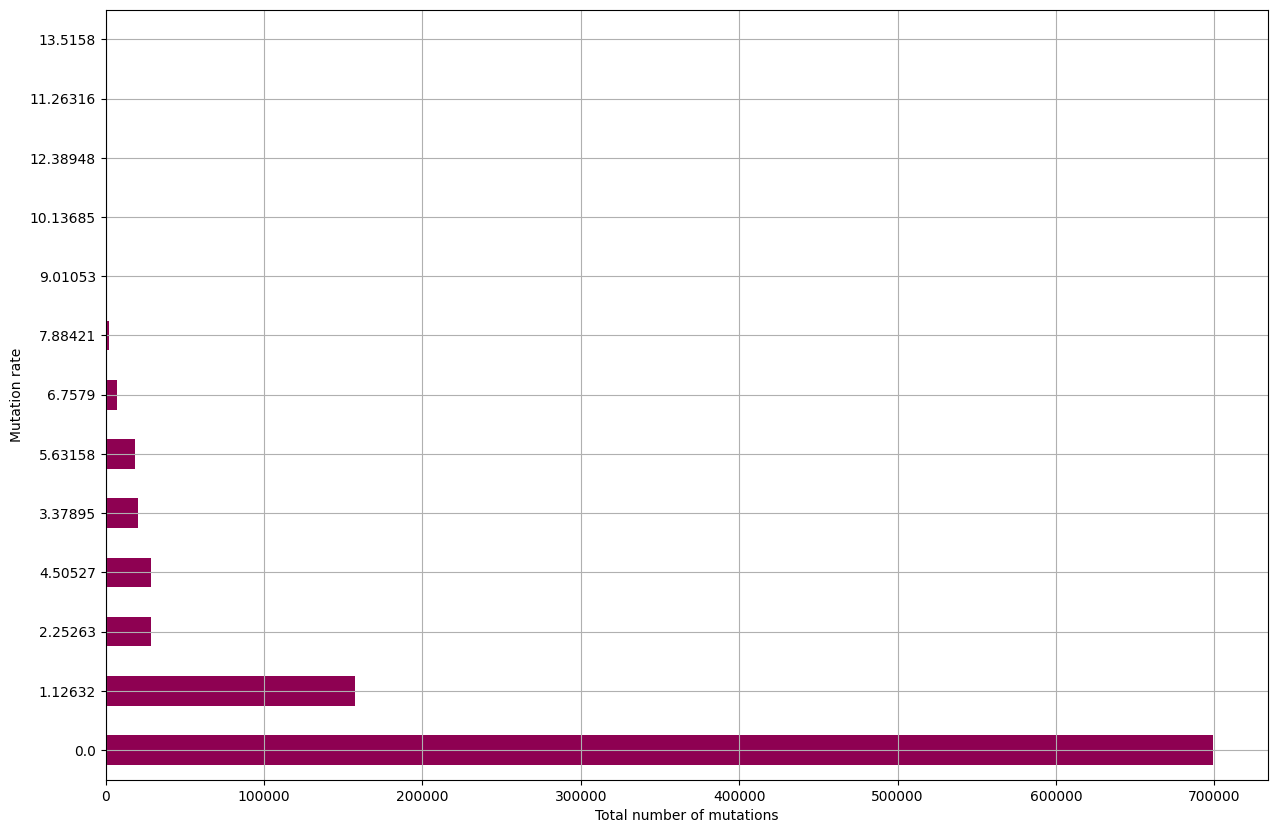

In [16]:
sum.plot(kind='barh',
    xlabel='Total number of mutations',
    ylabel='Mutation rate',
    #title='',
    figsize=(15,10),
    grid=True,
    cmap='PiYG',
    )
plt.savefig(os.path.join("notebooks_7proteins", "plots", "barh.jpg"), dpi=400)